## Example Usage of Basic Function

- **Detector**
  - Place a single detector module
  - Tile multiple detector modules at a specific z-position
- **Particle**
  - Generate a single particle
  - Generate a particle and decay

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from models.detector import DetectorModule
import models.detector as de
from models.particle import Particle, LLParticle
from config.plot_config import *

In [2]:
# Create an instance of the 'DetectorModule' class
d1 = DetectorModule(50, (0,0,0))
print(d1)

DetectorModule(size=50cm, position=(0, 0, 0), price=35万)


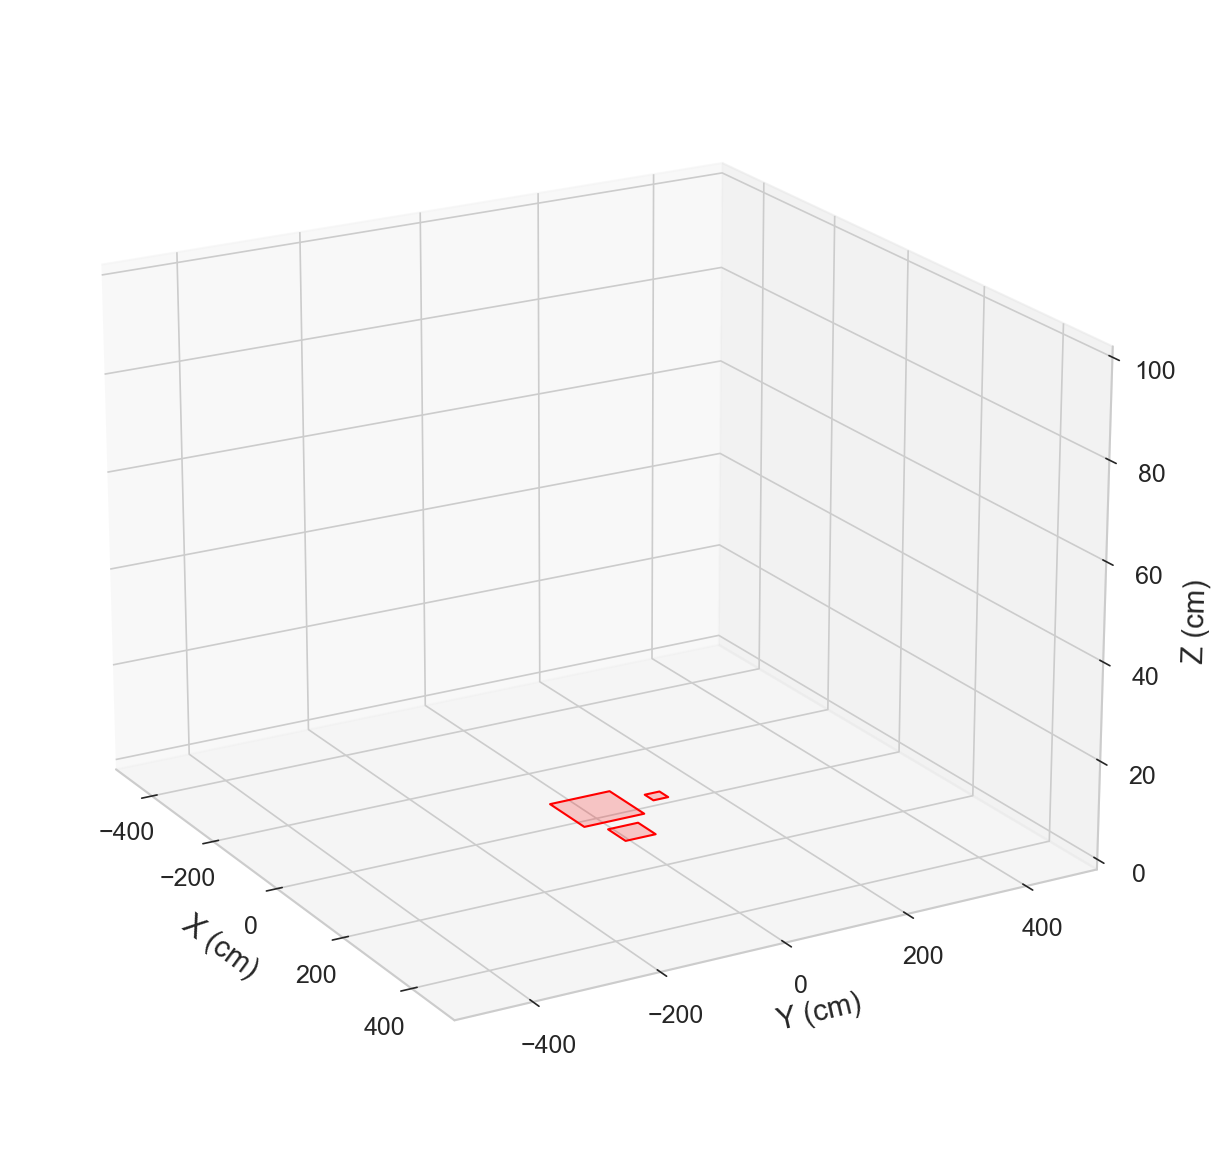

In [3]:
# Step-by-step construction of individual DetectorModule objects
det1 = []
det1.append(DetectorModule(100, (0, 0, 0)))
det1.append(DetectorModule(50, (100, 0, 0)))
det1.append(DetectorModule(25, (0, 100, 0)))


fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

for d in det1:
    z = d.position[2]
    d.plot(ax, color='red')

plt.show()

Number of detector modules: 25


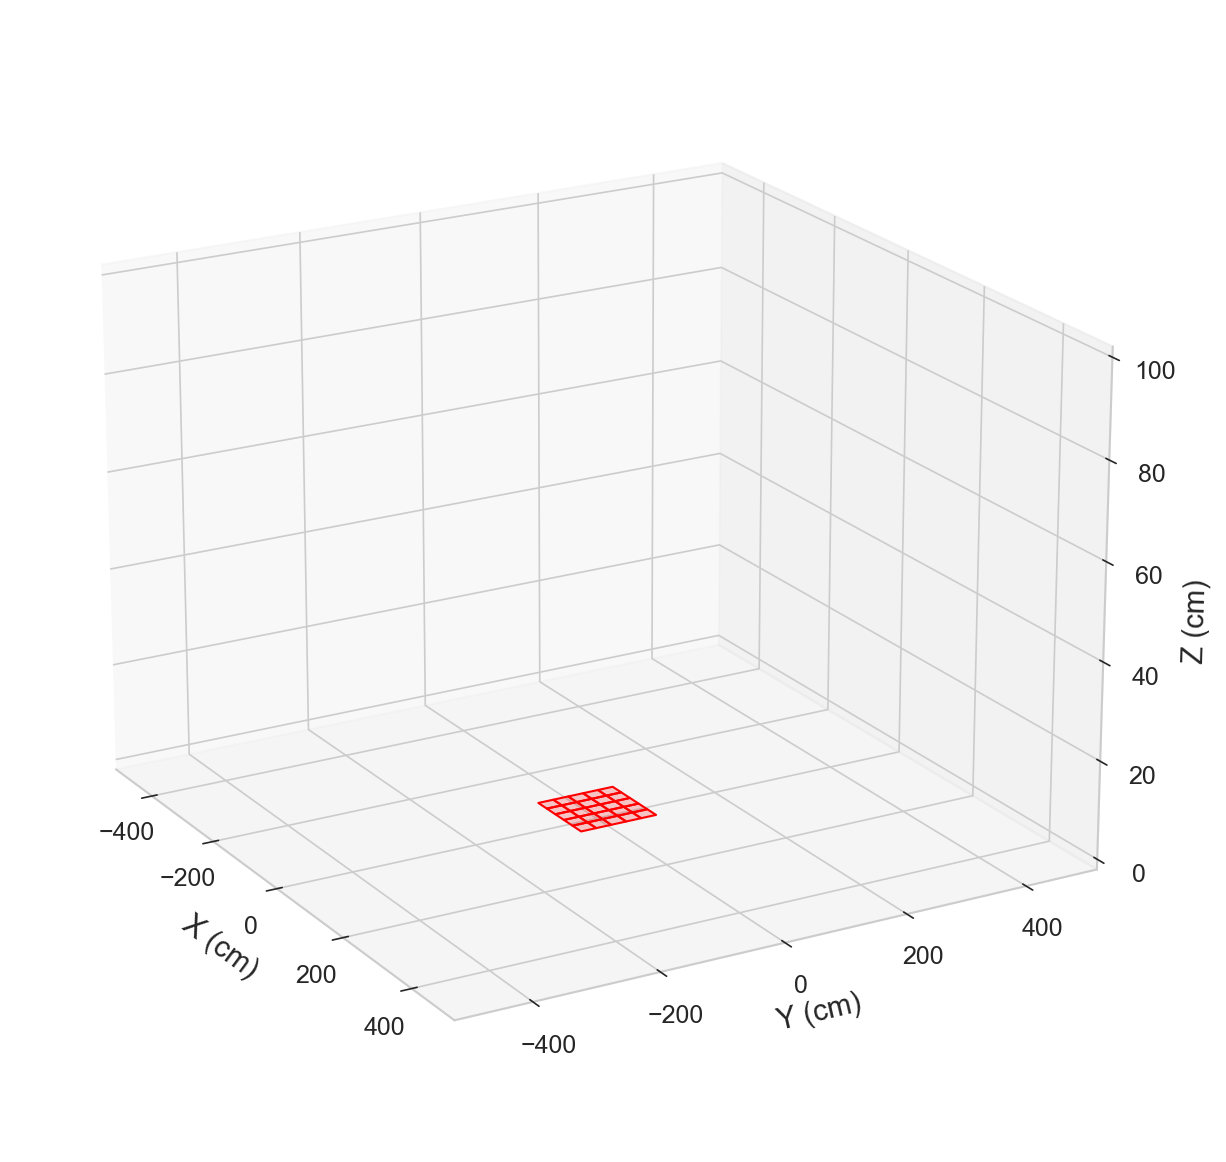

In [4]:
# Construct a tiled detector layer at a single z-position
det2 = de.Set_Detector_Module(25, 50, 50, 0)
print(f"Number of detector modules: {len(det2)}")


fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

for d in det2:
    z = d.position[2]
    d.plot(ax, color='red')

plt.show()

In [5]:
# Calculate total price
de.Get_Price(det2)

Total price is within budget: 300


300

----

Particle(position=[0. 0. 0.], direction=[-0.59925407 -0.25117087  0.76013667]), speed=5.0


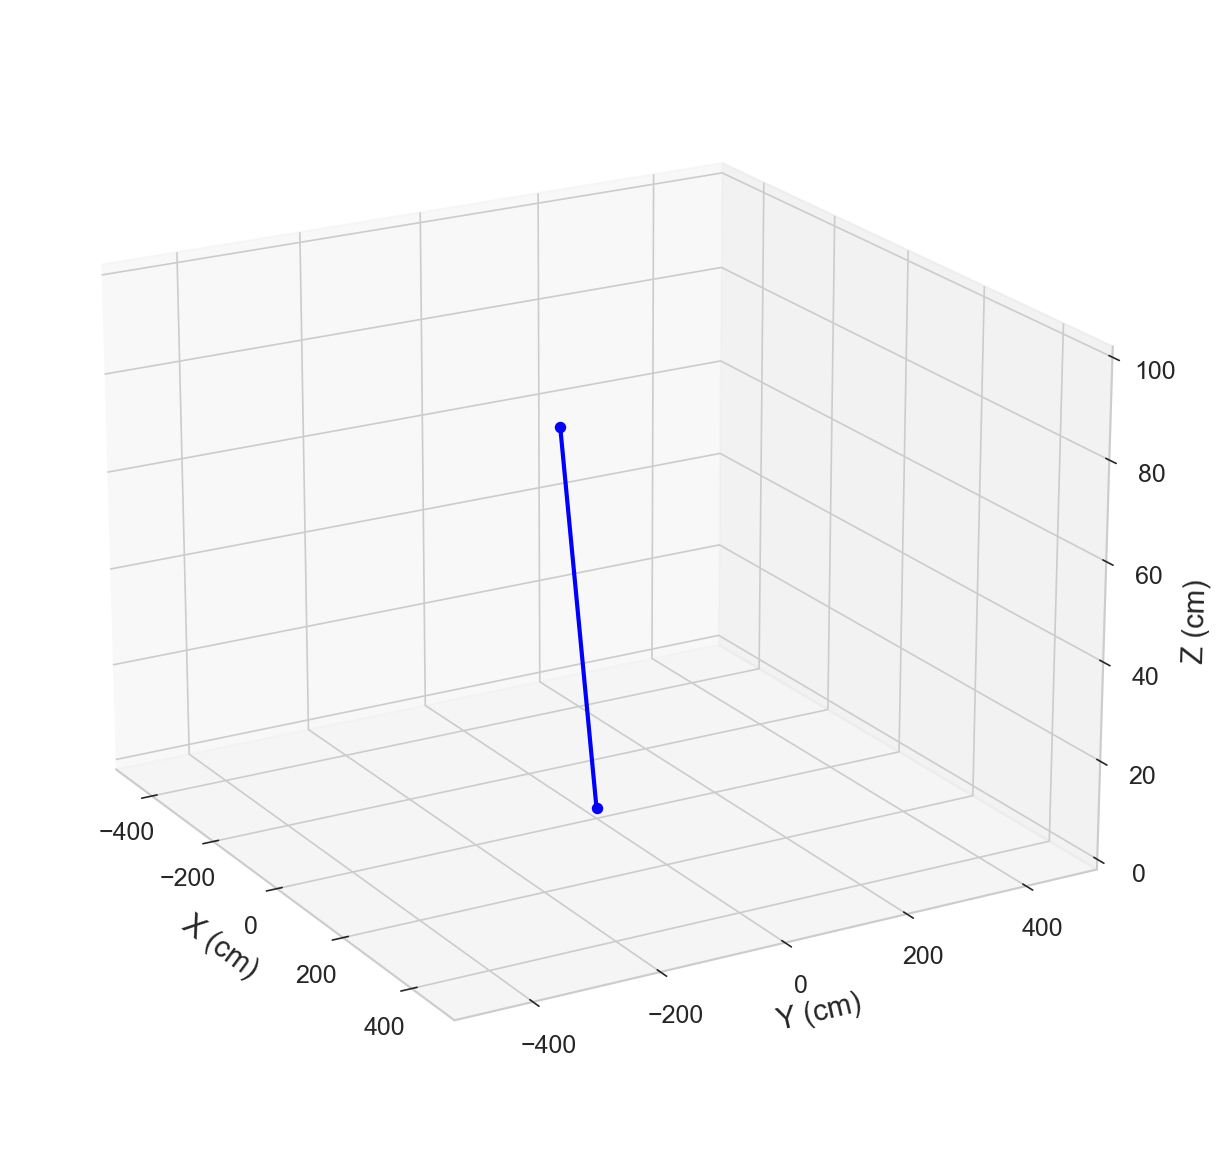

In [6]:
# Create an instance of the 'Particle' class
P1 = Particle()
print(P1)

start = P1.position
end = P1.position_t(20)


fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color='b', zorder=100)
ax.scatter(*start, color='b', label='Start')
ax.scatter(*end, color='b', label='End')

plt.show()

Mother Particle: Particle(position=[0. 0. 0.], direction=[-0.44775494 -0.28355273  0.84800552])
Decay time=8.644626747452254, Decay at=[-19.35337152 -12.25603757  36.6534561 ]
Decay Product1 direction=[ 0.44074842 -0.34125997  0.83023037]
Decay Product2 direction=[-0.89507474 -0.09733787  0.43516266]


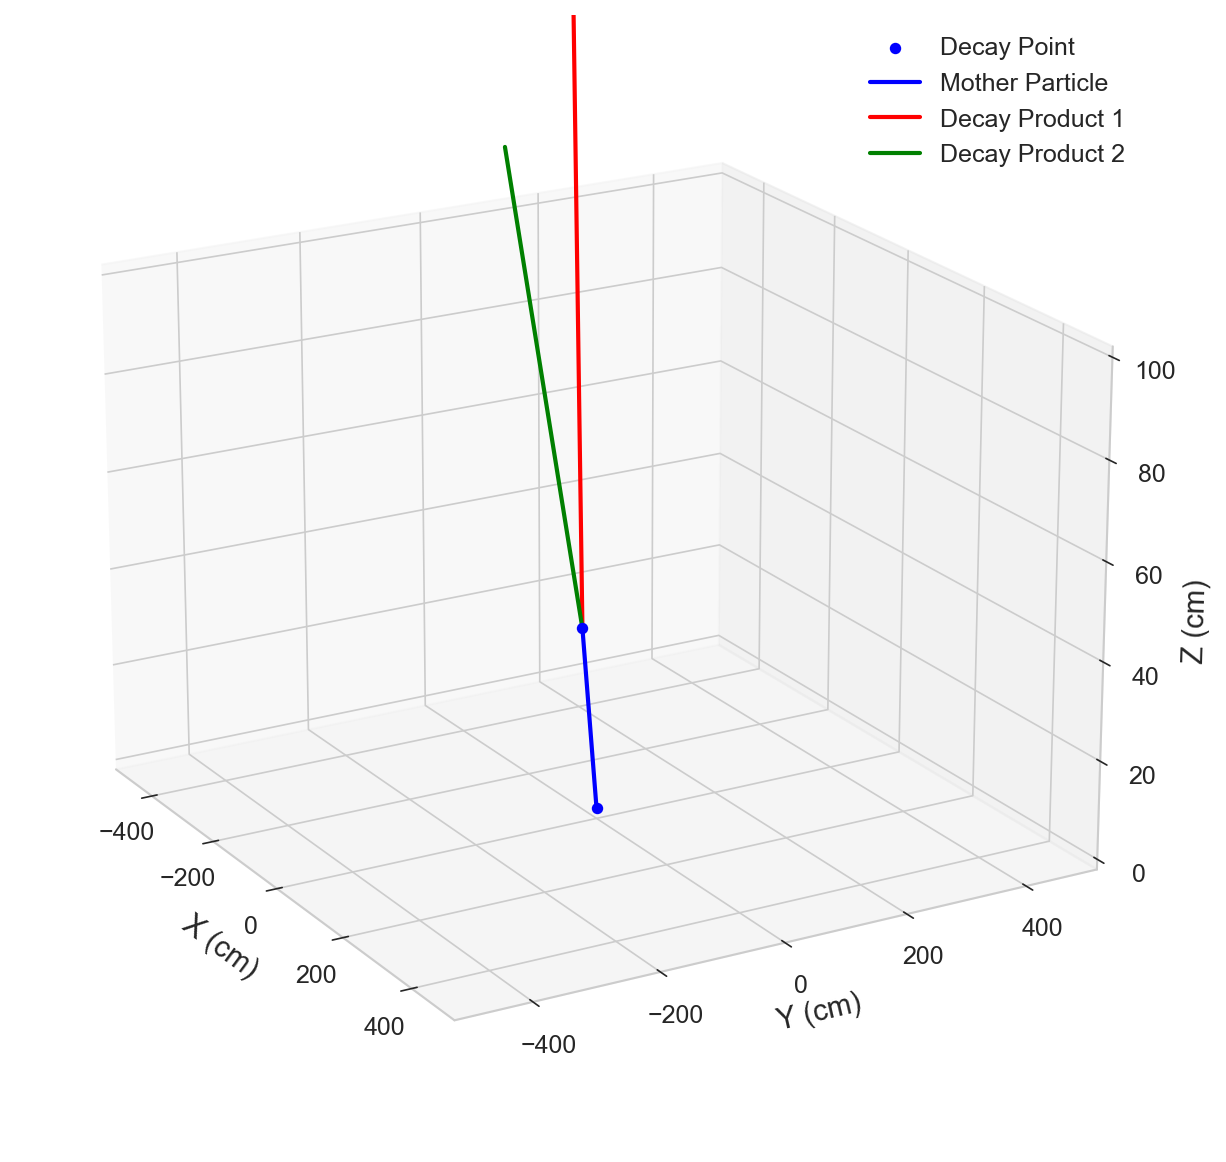

In [7]:
# Create an instance of decay particle
P2 = LLParticle()
print(f"Mother Particle: {P2}")
P3, P4 = P2.decay()
#print(f"Decay Product 1: {P3}")
#print(f"Decay Product 2: {P4}")

decay_time = P2.decay_time
start = P2.position
end = P2.position_t(decay_time)


fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

ax.scatter(*start, color='b')
ax.scatter(*end, color='b', label='Decay Point')
ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color='b', label='Mother Particle')
ax.plot([P3.position[0], P3.position_t(50)[0]], [P3.position[1],P3.position_t(50)[1]],[P3.position[2],P3.position_t(50)[2]], color="red", label="Decay Product 1")
ax.plot([P4.position[0], P4.position_t(50)[0]], [P4.position[1],P4.position_t(50)[1]],[P4.position[2],P4.position_t(50)[2]], color="green", label="Decay Product 2")

plt.legend()
plt.show()